In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import r2_score

%matplotlib inline

## Import data

In [4]:
df = pd.read_csv('../../databases/A3_formatted_dataset.csv')
df.keys()

Index(['C', 'Mn', 'Si', 'Cr', 'Ni', 'A3'], dtype='object')

In [5]:
x =  df.copy().drop('A3', axis=1)

## Empirical

In [6]:
def A3_Andrews(C=0, Ni=0, Mn=0, Si=0, Cr=0):
    return 910 - 203*C**.5 + 44.7*Si - 15.2*Ni - 30.0*Mn + 11.0*Cr

In [25]:
A3_empirical = A3_Andrews(df['C'], df['Ni'],
                          df['Mn'], df['Si'], df['Cr'])

## Plot

In [26]:
A3_real = df.loc[df['C'] < .6, 'A3']
A3_empirical = A3_empirical.loc[df['C'] < .6]

Text(0, 0.5, 'A3 Andrews (°C)')

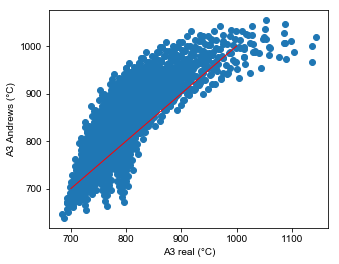

In [27]:
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(A3_real, A3_empirical)
ax.plot([700, 1000], [700, 1000], 'r-')
ax.set_xlabel(u'A3 real (°C)')
ax.set_ylabel(u'A3 Andrews (°C)')

## R2

In [35]:
def R2_nao_nutela(y_true, y_pred):
    y_bar = y_true.mean()
    SQ_tot = np.sum((y_true - y_bar)**2)
    SQ_res = np.sum((y_pred - y_true)**2)
    return 1. - SQ_res/SQ_tot


In [36]:
print(R2_nao_nutela(A3_real, A3_empirical))
print(r2_score(A3_real, A3_empirical))

0.22174254713488828
0.22174254713488828
